### importing libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### data loading & cleaning

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [4]:
df.drop(columns=['sl_no'],inplace=True)

In [5]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [6]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df['salary'].fillna(value=0,inplace=True)

In [8]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
df.nunique()

gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             46
dtype: int64

### data visualization

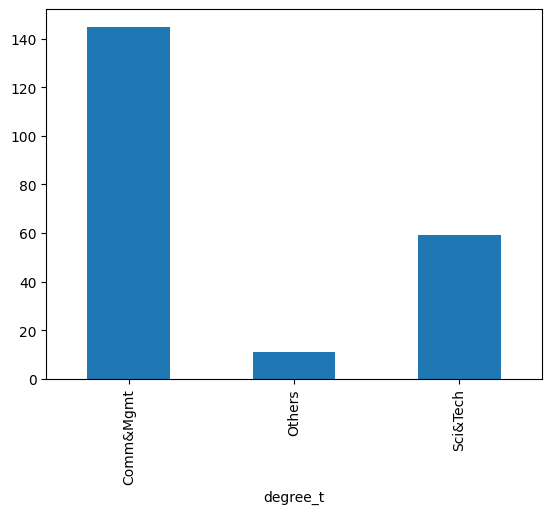

In [10]:
df.groupby(['degree_t'])['status'].count().plot(kind='bar')
plt.show()

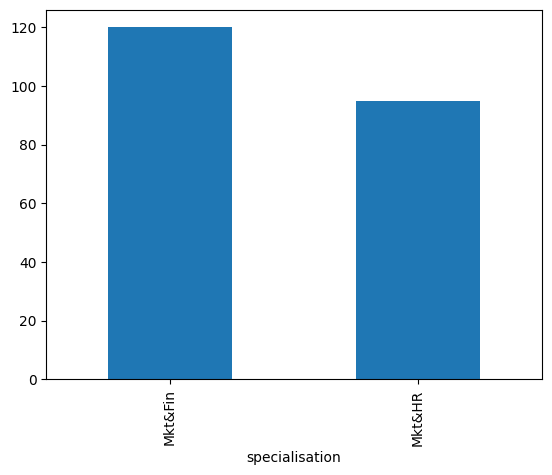

In [11]:
df.groupby(['specialisation'])['status'].count().plot(kind='bar')
plt.show()

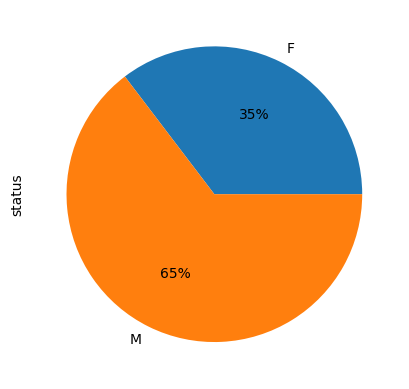

In [17]:
df.groupby(['gender'])['status'].count().plot(kind='pie', autopct='%.f%%')
plt.show()

In [ ]:
# work experience 
px.pie(df,names='workex')

<Axes: xlabel='workex', ylabel='count'>

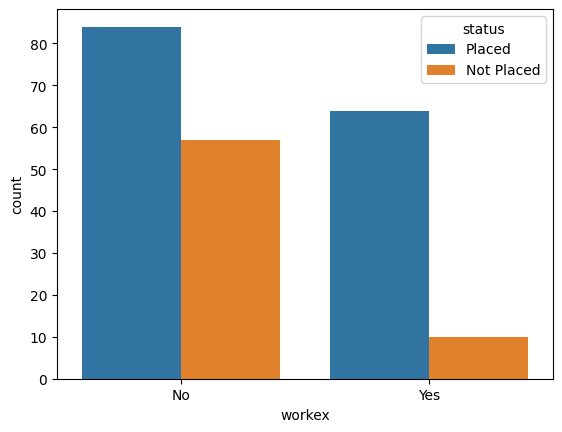

In [21]:
# influence of experience on placement
sns.countplot(x = 'workex',hue = "status",data = df)

In [22]:
# mba marks vs placement status
px.box(df,y = "status",x = 'mba_p')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'mba_p=%{x}<br>status=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'box',
              'x': array([58.8 , 66.28, 57.8 , ..., 69.72, 60.23, 60.22]),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['Placed', 'Placed', 'Placed', ..., 'Placed', 'Placed', 'Not Placed'],
                         dtype=object),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'mba_p'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'status'}}}
})

In [ ]:
# relation between employability test and mba percentage
px.scatter(df,x="mba_p",y="etest_p",color="status",facet_col="workex")

In [ ]:
px.violin(df,y="salary",x="specialisation",color="gender",points="all")